# Refresher [Link](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random Forest Classifier

RF is an ensemble learner. EF is an ensemble of many weak learners (Decistion Trees DTs)

In [2]:
# Creating DTs
#DTs usebinary splitting to make decisions on features (the question we ask)

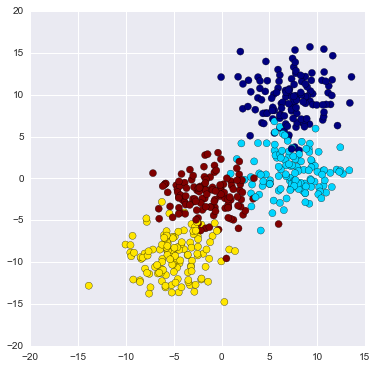

In [8]:
# using make_nlobs from slearn.datasets, create fake data

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500,centers=4, random_state=8,cluster_std=2.4)
#X will be default two features
#y will be the 4 classes mentioned

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Visualization founction

def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

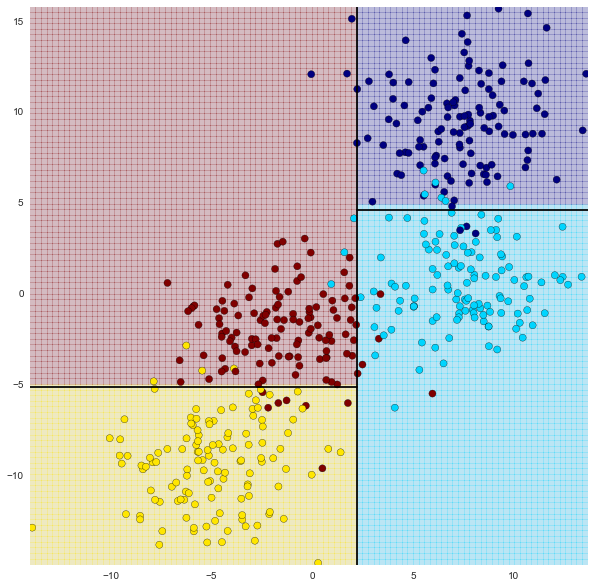

In [14]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(clf,X,y)

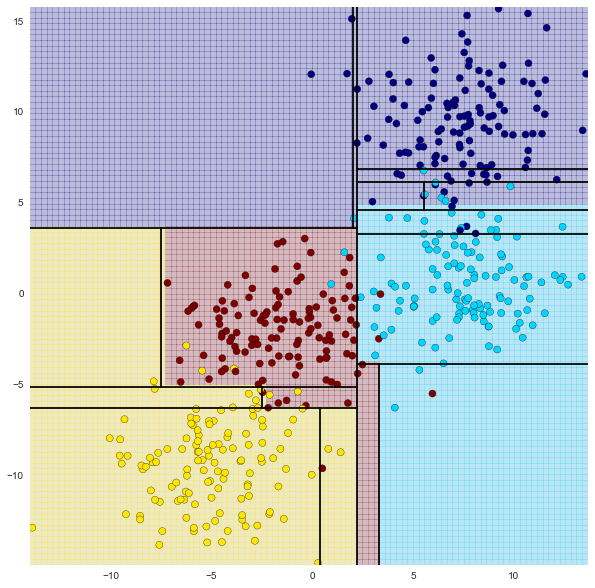

In [15]:
#How about 4 levels deep?

# Set model variable
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)


In [16]:
#boundaries change substantially. This scenario is overfitting. 
#Meaning, if we need to predict a new point, 
#result is influence more by noise than signal
#To avoid this, we use ensemble of decision trees, or Random Forests

Ensemble Methods essentially average the results of many individual estimators which over-fit the data. The resulting estimates are much more robust and accurate than the individual estimates which make them up! One of the most common ensemble methods is the Random Forest, in which the ensemble is made up of many decision trees which are in some way perturbed.

In [17]:
#n_estimators: number of trees. More the number of trees the better, 100-400 is
#about the limit depending on data. Choose wisely to reduce load on computer

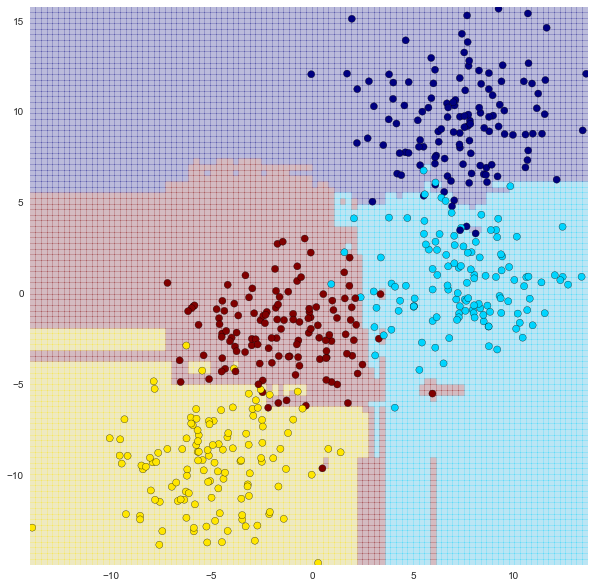

In [18]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

## Random Forests for Regression

#### making a weather data that has sinusoidal pattern with noise. Slow oscillation component and fast oscilation component and random noise component

<Container object of 3 artists>

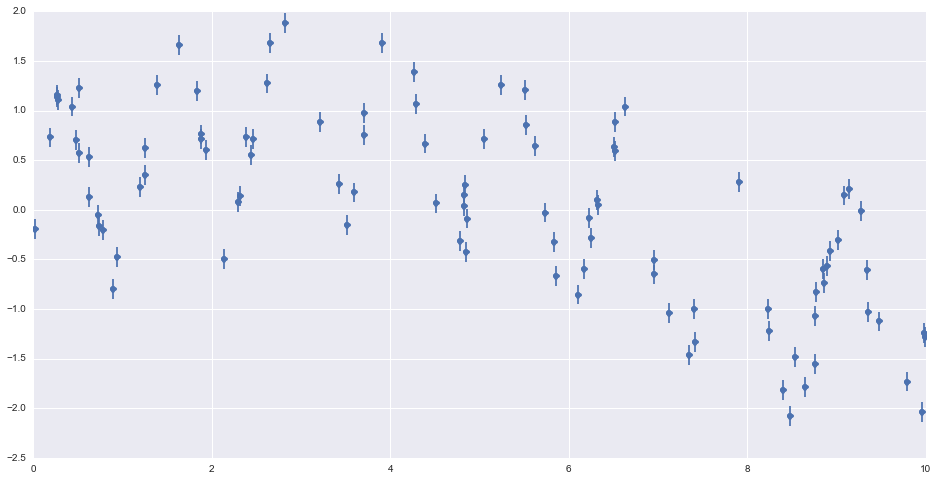

In [19]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

x=10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
    noise = sigma * np.random.randn(len(x))
    
    return np.sin( 5* x) + np.sin(0.5 *x) + noise

#Call y for data with x

y=sin_model(x)

#plot

plt.figure(figsize=(16,8))
#error made up to show points clearly
plt.errorbar(x,y,0.1,fmt='o')

using RF regressor to create a fitted regressor. linear regressor will not work.
polynomial or sinusoidal will be a tedious procedure

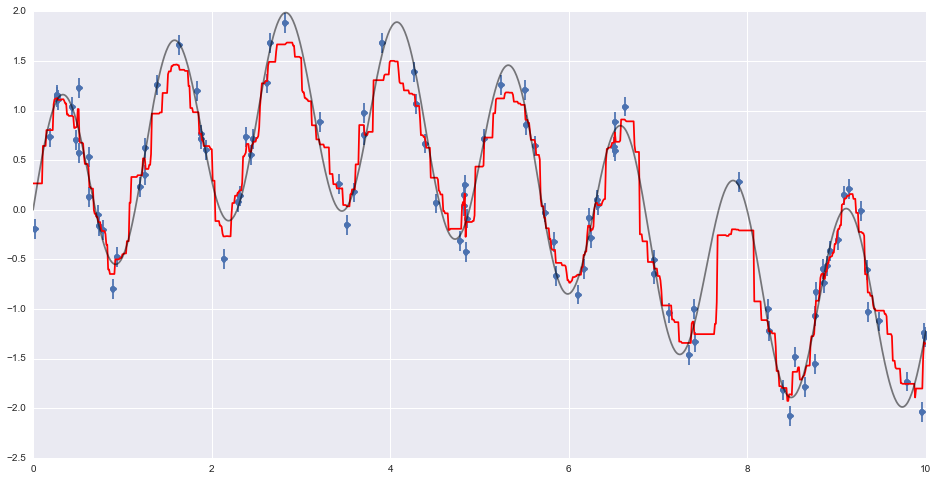

In [24]:
# X points
xfit = np.linspace(0,10,1000)
#model
RFR = RandomForestRegressor(100) #number of estimators=100

#Fit model(format array for y with [:,None]) #known points=100
RFR.fit(x[:,None],y)

#Set predicted points #unknown points=1000
yfit = RFR.predict(xfit[:,None])

#Set real points(the model function) # I know this, so let me plot it
ytrue=sin_model(xfit,0)

#Plots
plt.figure(figsize=(16,8))
plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k',alpha=0.5)

Resources for Random Forests:

[Extensive Article on Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

[Kaggle Overview](https://www.kaggle.com/wiki/RandomForests)

[A whole webpage form the inventors themselves! Leo Breiman and Adele Cutler](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)

